# Pymaceuticals Inc.
---

### Analysis


 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:

# Checking the number of mice.
mice_count = len(data_combined["Mouse ID"].unique())
mice_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint = data_combined.loc[data_combined.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_timepoint

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = data_combined.loc[data_combined["Mouse ID"] == "g989" , :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_combined[data_combined['Mouse ID'].isin(duplicate_timepoint)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(clean_data["Mouse ID"].unique())
mice_count2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
standard_deviation = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
SEM = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()


statistics = pd.DataFrame(
    {
        "Mean": mean,
        "Median": median,
        "Variance": variance,
        "Standard Dev": standard_deviation,
        "SEM": SEM
    }
)

statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen




,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:

# Using the aggregation method, produce the same summary statistics in a single line.
aggregate =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

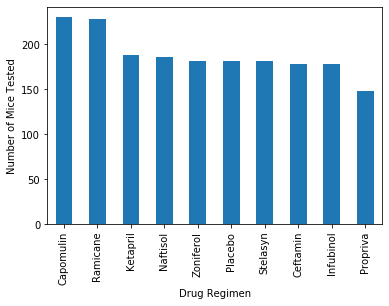

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimanpermouse = clean_data["Drug Regimen"].value_counts()
regimanpermouse

pandas_bar = regimanpermouse.plot(kind="bar", color="blue", figsize=(5,3),
                                title="Mice per Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice")


xticklabels = regimanpermouse.index
pandas_bar.set_xticklabels(xticklabels, rotation=40, rotation_mode="anchor", ha="right", wrap=True)

plt.show()

In [16]:
mice_per_drug = clean_data["Drug Regimen"].value_counts()
mice_per_drug


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

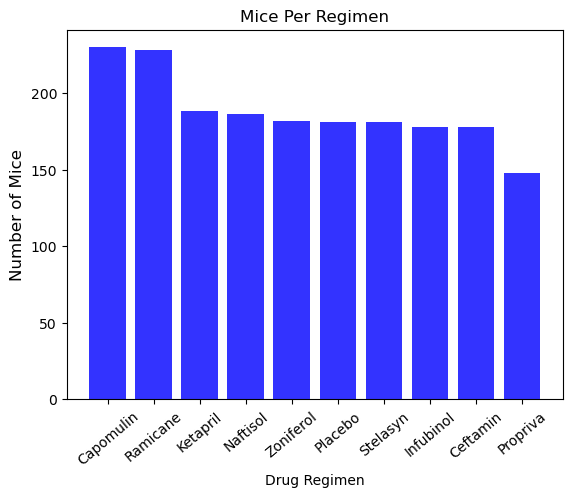

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_per_drug.index.values
y_axis = mice_per_drug.values

plt.title("Mice Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice", fontsize=12)
plt.xticks(rotation = 40)

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.show()

<AxesSubplot:>

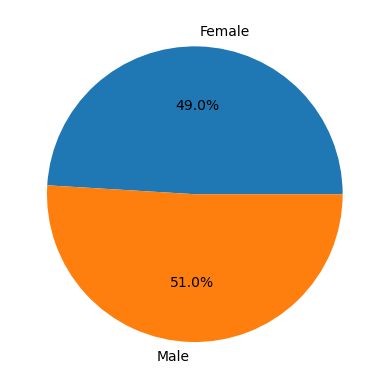

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_data.groupby(["Sex"])["Mouse ID"].count().plot.pie(label="",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1d3590774c0>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Male'),
  Text(0.03455180204558458, -1.0994572174374968, 'Female')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(0.01884643747940977, -0.5997039367840891, '49.0%')])

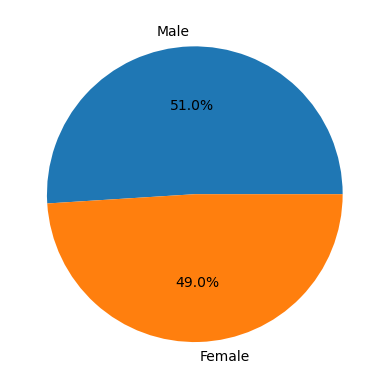

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
colors = ["Blue", "Orange"]
sizes = [51,49]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each  mouse

total_regimens=clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")|
                (clean_data["Drug Regimen"]=="Ramicane")|
                (clean_data["Drug Regimen"]=="Infubinol")|
                (clean_data["Drug Regimen"]=="Ceftamin") ,:]

total_regimens=total_regimens.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
total_regimens=pd.merge(total_regimens,clean_data[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
                        ,on=["Mouse ID","Timepoint"],how="left")
total_regimens



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Start by getting the last (greatest) timepoint for each mouse
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset    
# Determine outliers using upper and lower bounds

list1 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimens = total_regimens[total_regimens["Drug Regimen"].isin(list1)]
regimens.head()

last_timepoint = regimens.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for regimens in list1:
    quartiles = last_timepoint[regimens].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f" ")
    print(f"The lower quartile of {regimens} treatments is: {lowerq}")
    print(f"The upper quartile of {regimens} treatments is: {upperq}")
    print(f"The interquartile range of {regimens} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {regimens} outliers.")
    print(f"Values above {upper_bound} could be {regimens} outliers.")
    print(f" ")
    treatment+=1


 
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
 
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
 
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
 
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 

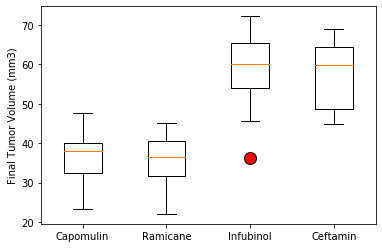

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



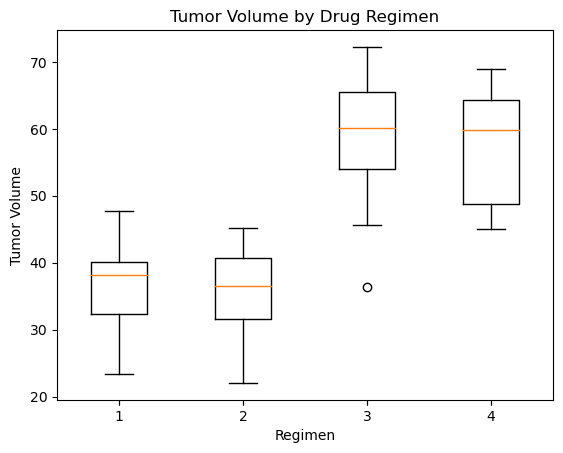

In [22]:
#boxplot
boxplot_list = []
for regimens in list1:
    boxplot_list.append(list(last_timepoint[regimens].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], list1, rotation = "horizontal")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

